Track1 Samples: 20372
Track2 Samples: 41052


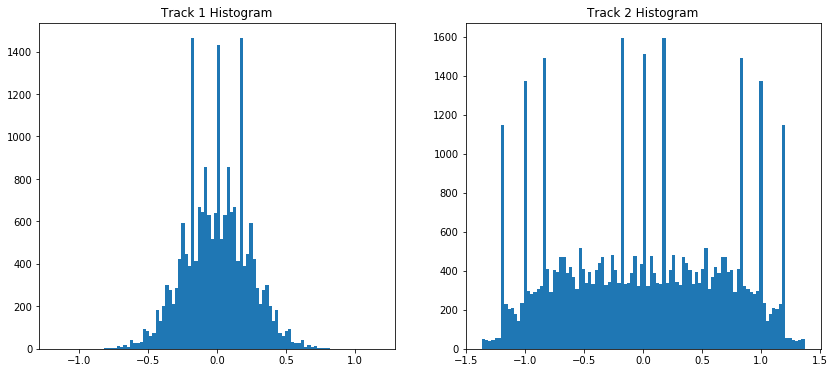

In [30]:
import matplotlib.pyplot as plt
import numpy as np
import random
import cv2

from data import Sample, load_samples, translate_samples, shadow_samples, flip_samples

# Visualizations will be shown in the notebook.
%matplotlib inline

samples_track1 = load_samples("data_track1", discard=0.85)
samples_track2 = load_samples("data_track2", discard=0.85)

translate_samples(samples_track1, prob=0.5)
flip_samples(samples_track1)
shadow_samples(samples_track1, prob=0)

translate_samples(samples_track2, prob=0.5)
flip_samples(samples_track2)
shadow_samples(samples_track2, prob=0)

print("Track1 Samples: {}".format(len(samples_track1)))
print("Track2 Samples: {}".format(len(samples_track2)))

st_track1 = []
for sample in samples_track1:
    st_track1.append(sample.get_steering())

st_track2 = []
for sample in samples_track2:
    st_track2.append(sample.get_steering())
    
fig = plt.figure(figsize=(14,6))
a=fig.add_subplot(1,2,1)
a.hist(st_track1, 100, normed=0)
a.set_title("Track 1 Histogram")
a=fig.add_subplot(1,2,2)
a.hist(st_track2, 100, normed=0)
a.set_title("Track 2 Histogram")

plt.show()

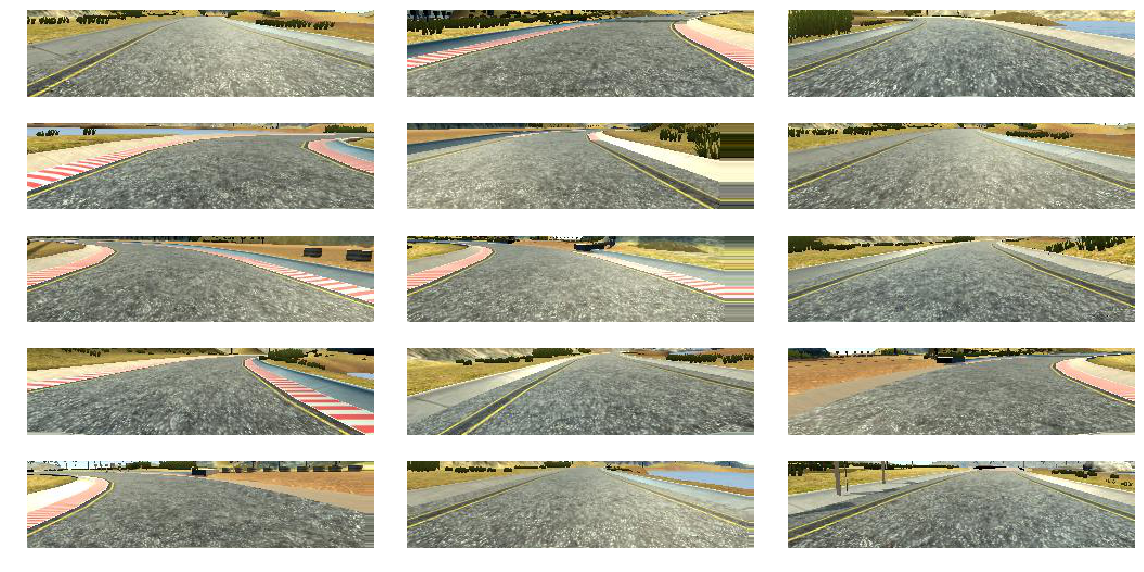

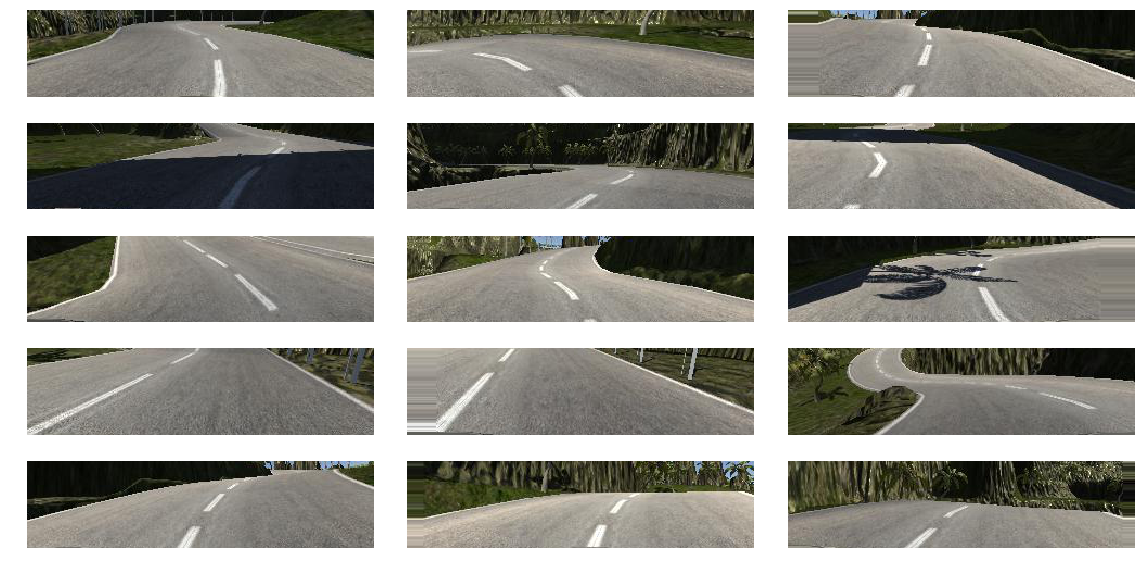

In [42]:
from model import generator

def plot_random_images(images):
    fig, axes = plt.subplots(5,3, figsize=(16,8))
    
    selected = random.sample(range(images.shape[0]), k=15)
    
    for i , ax in enumerate(axes.flat):
        image = images[selected[i]]
        y, x, c = image.shape
        ax.set_axis_off()
        imgplot = ax.imshow(image)
    
    plt.tight_layout()
    plt.show()

for X_track1, y_track1 in generator(samples_track1, 256, (80,320,3)):
    plot_random_images(X_track1)
    break
    
for X_track2, y_track2 in generator(samples_track2, 256, (80,320,3)):
    plot_random_images(X_track2)
    break

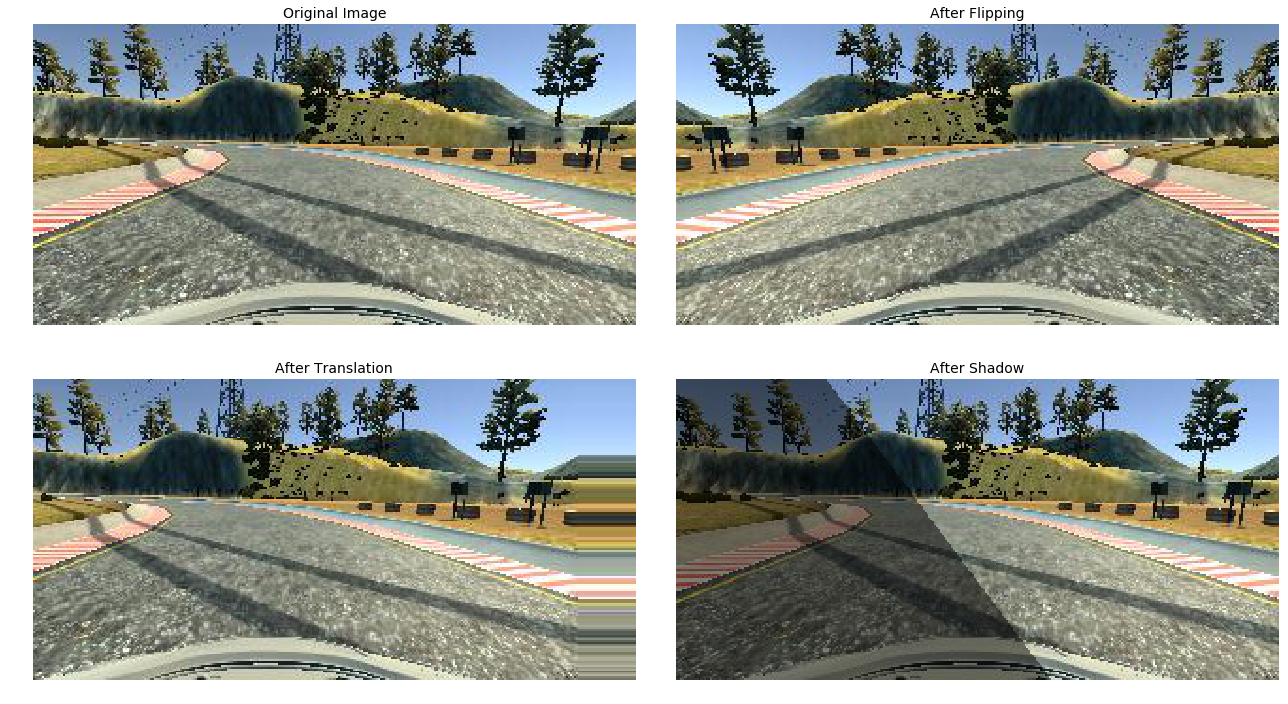

In [16]:
from PIL import Image

from data import translate_image, shadow_image


img = np.asarray(Image.open("examples/left_turn.jpg"))

fig = plt.figure(figsize=(18,10))
a=fig.add_subplot(2,2,1)
a.set_title("Original Image", fontsize=14)
a.set_axis_off()
a.imshow(img)
a=fig.add_subplot(2,2,2)
a.set_title("After Flipping", fontsize=14)
a.set_axis_off()
a.imshow(cv2.flip(img, 1))
a=fig.add_subplot(2,2,3)
a.set_title("After Translation", fontsize=14)
a.set_axis_off()
a.imshow(translate_image(img, -30))
a=fig.add_subplot(2,2,4)
a.set_title("After Shadow", fontsize=14)
a.set_axis_off()
a.imshow(shadow_image(img, 80, 200))

plt.tight_layout()
plt.show()